    
## Objective:

To fetch the product name, rating, review details from Amazon then parsing the reviews finally to get review sentiments. Also, to identify positive and negative features and recommend best phones within the budget. 


## Procedure: 

1. Go to amazon.in and scrape the customer reviews of 100 mobile phones - used scrapy
2. Develop a Sentiment Analysis model using the data provided as training data.
3. Used the model to evaluate the sentiment of the customer reviews scraped.
4. Fetched key positive and negative features by wordcloud.
5. Developed workflow diagram for business understanding.



## Importing essential libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import json
import re
from bs4 import BeautifulSoup 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud


import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors


In [7]:
pwd

'C:\\Users\\User\\OneDrive\\Desktop\\project\\Sentiment Analysis'

## Data scraping
1. Data is scraped using amazon_reviews.py file. 
2. domain names,url list from where the data needs to be scraped is mentioned in this file.
3. Page numbers for the reviews are mentioned.
4. Brand name, model name are also mentioned to extract the reviews.
5. reviews.csv file is created for every brand name.
6. Multiple .json files are created for each product. Total 100 json files. 
7. All json files are consolidated to final_dataset.csv
8. this dataset file is used for further analysis.

## Data Preprocessing:

In [8]:
# review_list = glob.glob("*.json")
# review_list

In [9]:
# all_files = {i:j for i, j in enumerate(review_list, 1)}

In [10]:
# Merging data from all files into a flat list.

data = []

# for i,j in all_files.items():
#         with open(j, 'r') as o:
#             json_data = json.load(o)
#             if json_data:
#                 data.append(json_data)
                
# flat_list = [item for sublist in data for item in sublist]

In [11]:
flat_list = pd.read_csv('final_dataset.csv')
flat_list

,Unnamed: 0,Brand,Model,stars,comment
0,0,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,At first glance it looks a bit bulky. Camera...
1,1,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Cons:_Over...
2,2,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome ca...
3,3,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Genuine Fe...
4,4,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Ok so here...
...,...,...,...,...,...
987,987,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very good...
988,988,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Battery ra...
989,989,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very bad ....
990,990,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Charging d...


In [12]:
## Creating a pandas dataframe using the flat list above.

df= pd.DataFrame(flat_list, columns=['Brand', 'Model', 'stars', 'comment'])
df.head()

,Brand,Model,stars,comment
0,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,At first glance it looks a bit bulky. Camera...
1,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Cons:_Over...
2,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome ca...
3,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Genuine Fe...
4,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Ok so here...


In [13]:
df_dataset= df.copy()
df_dataset

,Brand,Model,stars,comment
0,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,At first glance it looks a bit bulky. Camera...
1,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Cons:_Over...
2,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome ca...
3,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Genuine Fe...
4,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Ok so here...
...,...,...,...,...
987,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very good...
988,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Battery ra...
989,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very bad ....
990,Vivo,"Vivo Y50 (Pearl White, 8GB RAM, 128GB Storage)",4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Charging d...


## Exploratory Data Analysis

In [37]:
# count the frequency of each stars column
df.stars.value_counts()

stars
5    379
1    357
4    133
2     61
Name: count, dtype: int64

In [52]:
## Replacing the text in the column 'stars' to required ratings integer values.

df["stars"]= df["stars"].replace({"5.0 out of 5 stars": 5,
                     "4.0 out of 5 stars": 4,
                     "3.0 out of 5 stars": 3,
                     "2.0 out of 5 stars": 2,
                     "1.0 out of 5 stars": 1})

df["stars"].value_counts()

stars
5    379
1    357
4    133
2     61
Name: count, dtype: int64

In [39]:
## Summarizing the data we have

print("Summary statistics of numerical features : \n", df.describe())

print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['Brand']))))
print("\nTotal number of unique products: ", len(list(set(df['Model']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%".format(df[df['stars']==3]["comment"].count()/len(df)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%".format(df[df['stars']>3]["comment"].count()/len(df)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%".format(df[df['stars']<3]["comment"].count()/len(df)*100))

Summary statistics of numerical features : 
             stars   Sentiment
count  930.000000  930.000000
mean     3.124731    0.550538
std      1.833644    0.497707
min      1.000000    0.000000
25%      1.000000    0.000000
50%      4.000000    1.000000
75%      5.000000    1.000000
max      5.000000    1.000000

Total number of reviews:  930

Total number of brands:  6

Total number of unique products:  98

Percentage of reviews with neutral sentiment : 0.00%

Percentage of reviews with positive sentiment : 55.05%

Percentage of reviews with negative sentiment : 44.95%


Text(0, 0.5, 'Count')

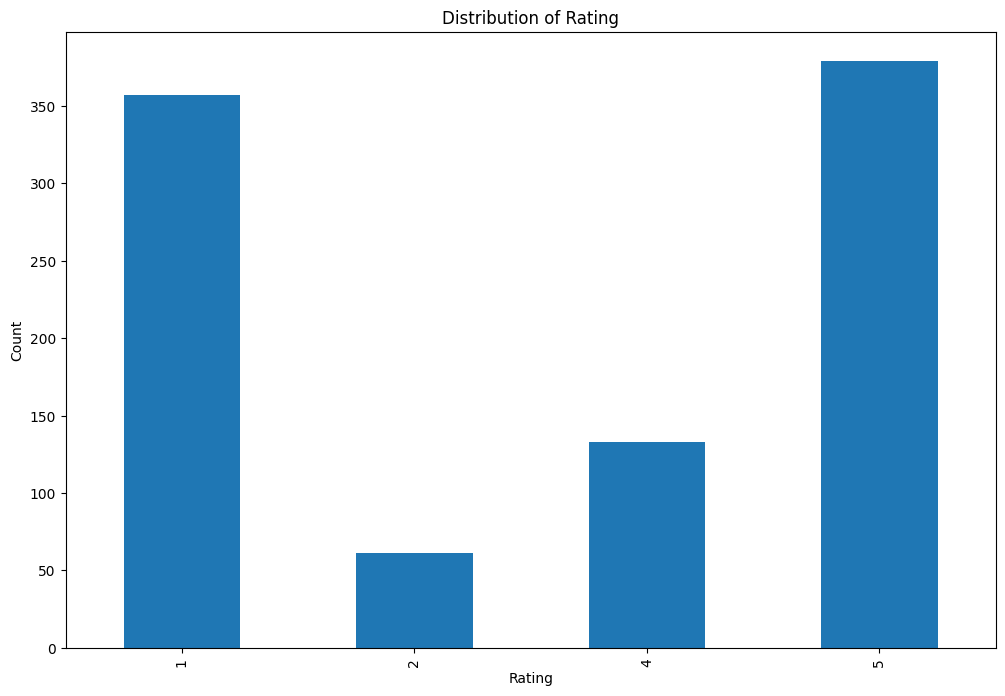

In [48]:
# Plotting distribution of rating

plt.figure(figsize=(12,8))
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for different Brands')

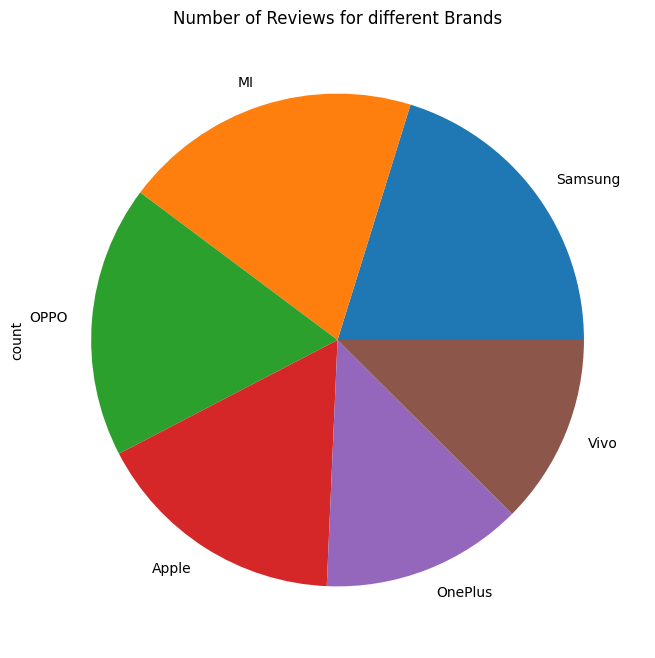

In [49]:
# Plotting  number of Reviews for different Brands

brands = df["Brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:].plot(kind='pie')
plt.title("Number of Reviews for different Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 10 Products')

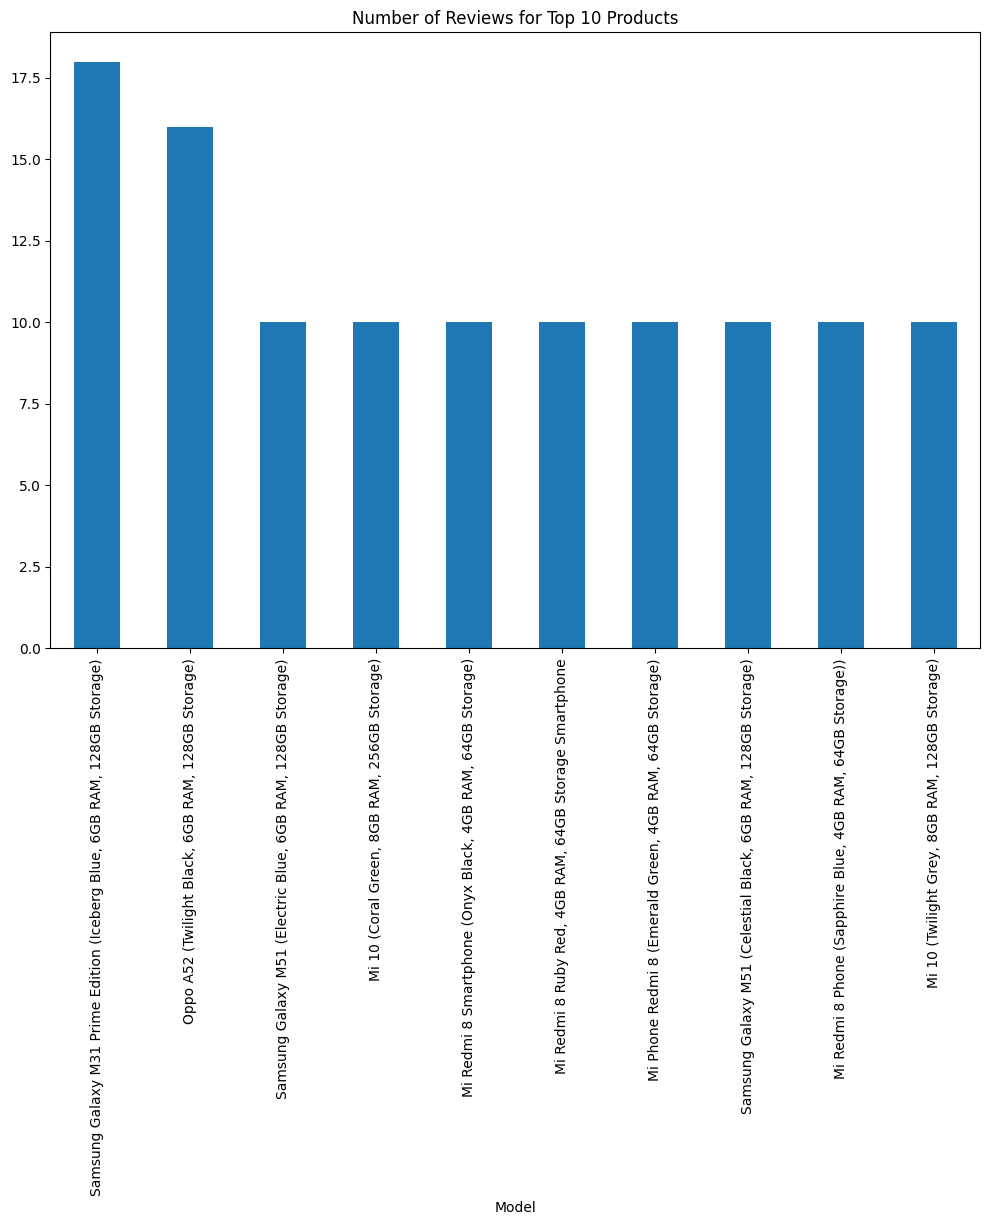

In [51]:
# Plotting number of reviews for all brands

products = df["Model"].value_counts()
plt.figure(figsize=(12,8))
products[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 10 Products")

Text(0, 0.5, 'Count')

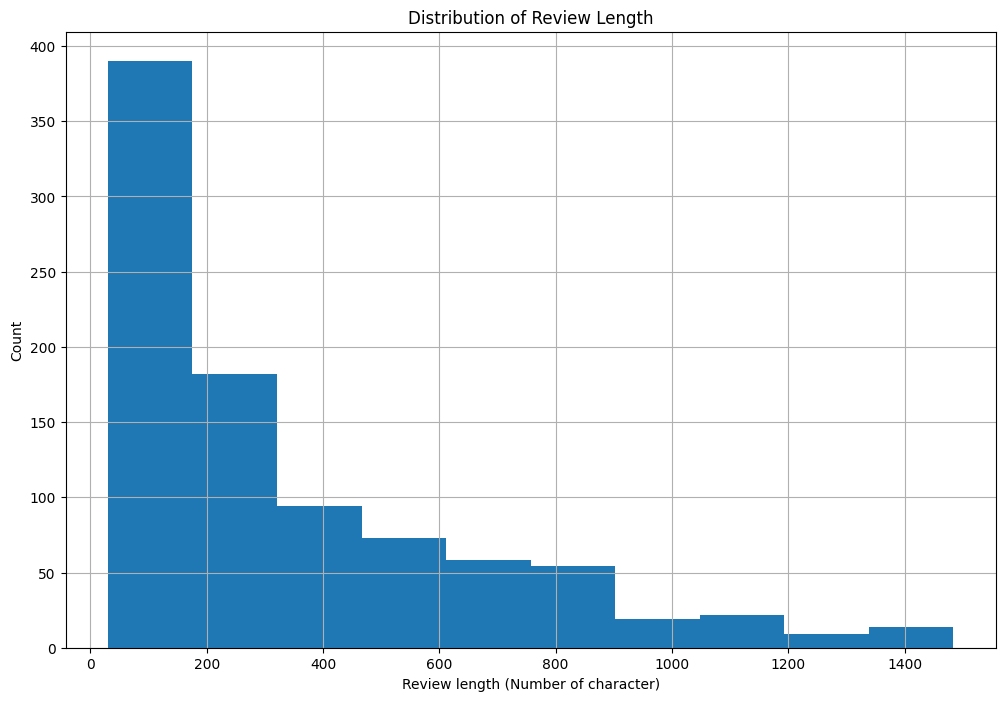

In [20]:
# Plotting distribution of review length

review_length = df["comment"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [21]:
# Dropping missing values
# Considering reviews with positive sentiment (rating = 4, 5) and negative sentiment (rating = 1, 2) 
# and dropping reviews with neutral sentiment (rating 3).

df.dropna(inplace=True)
df = df[df['stars'] != 3]

# Encoding 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['stars'] > 3, 1, 0)
df.head()

,Brand,Model,stars,comment,Sentiment
0,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5,At first glance it looks a bit bulky. Camera...,1
1,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1,\n\n\n\n\n\n\n\n\n\n \n \n \n Cons:_Over...,0
2,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome ca...,1
3,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",1,\n\n\n\n\n\n\n\n\n\n \n \n \n Genuine Fe...,0
4,Samsung,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",5,\n\n\n\n\n\n\n\n\n\n \n \n \n Ok so here...,1


In [22]:
# Splitting data into training set and validation


X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['Sentiment'], test_size=0.3, random_state=0)

print('Loading %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))

Loading 651 training examples and 279 validation examples. 



### Creating a Bag of Words representation and Text Preprocessing:

To classify the reviews into positive and negative sentiment, We first need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

1. Preprocess raw reviews to cleaned reviews
2. Create Bag of words using Tfidfvectorizer in sklearn
3. Transform review text to numerical representations (feature vectors)

### Fit a model. Regression in this case. Using logistic regression as sentiments are 1 and 0.

1. Fit feature vectors to supervised learning algorithm, logistic regression.
2. Evaluate the model results
3. Create wordclouds for positive and negative features.
4. Recommend top 10 mobile phones based on the sentiment.

### Creating a function to do text preprocessing
1. Remove html tags using BeautifulSoup
2. Remove non-character such as digits and symbols
3. Convert to lower case
4. Remove stop words such as "the" and "and" if needed
5. Convert to root words by stemming if needed

In [23]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocessText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    # Removing HTML
    text = BeautifulSoup(raw_text, 'html.parser').get_text() 
    
    # Removing non-character
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # Tokenizing the text
    words = letters_only.lower().split()
    
    # Removing stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if w not in stops]
    
    # Stemming words
    if stemming:
        porter = PorterStemmer()
        words = [porter.stem(w) for w in words]
    
    # Joining words back
    if not split_text:
        return " ".join(words)
    
    return words

# Assuming X_train and X_test are defined
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(preprocessText(d))

print('Showing a cleaned review in the training set: \n\n', X_train_cleaned[3])

for d in X_test:
    X_test_cleaned.append(preprocessText(d))

print('Showing a cleaned review in the test set: \n\n', X_test_cleaned[3])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\User\AppData\Local\Temp\ipykernel_708\2316324503.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(raw_text, 'html.parser').get_text()


Showing a cleaned review in the training set: 

 in my opinion don t think much about the phone just get it i am attaching night mode on and off pictures check the differencepros best camera best security long day battery life touch id improved its an iphone after all best night mode support best processors a bionic chipcons display could have been oled in this price but if doesn t matter this retina lcd is really awesome slightly bulky and weighty if u r shifting from iphone or thick bezelsguys i am both samsung as well as iphone fan but this price range i would suggest you to order iphone its really a great deal and if u r a long time iphone user then this will be really great for you got for it guys
Showing a cleaned review in the test set: 

 this mobile is not good so many problems hanging heating don t buy waste of money


In [24]:
X_train_cleaned[0]

'update never give a chance to regret go ahead the icons looks was not so great and then i set spherlue icons from theam and now its looks better with dark mode even though its mah i always leaves phone on charging before go to bed i like to see my phone every morning so i turned off fast charging option you can do that its will not affect batterymonster battery two day battery standby for normal easy display super amaload with full hd superb display design it has a mah battery still looking not bulky noglass body but who cares after you put a back cover in my opinion don t spend more money for glass body if you uses back covers camera back camera pretty good but front camera s low light output is very low many features available such as slow and super slow videos available os ui android with one ui finger print reader and face lock face lock and finger print reader are not so fast processor and performance exynos is not meant for pubg gamers but for me its perfect as i am not a heavy 

In [25]:
X_test_cleaned[0]

'i decided to finally upgrade my phone after years after lots of research with around k budget initially i wanted to go for k pro but have been using mi phones for last years so it seemed only hardware upgrade with everything feeling same after research i finally decided to buy this phone and after inital hours of usage it looks awesome i am not a gamer and focussed on mainly camera storage and its totally worth it i will give detailed feedback after using it for sometime also thanks to amzon for quick delivery k discount was the highlight since k looks slightly on expensive side i already have started liking color os over miui case you get with this phone is very premium earphone quality is also too good clicked few photo samples and it s more than what i had expected glad that i bought this phone'

In [26]:
# Defining a function check the Model Evaluation Metrics

def modelEvaluation(predictions):
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [27]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) # Taking a minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print(X_train_tfidf.shape)
print(y_train.shape)
print("Number of features : %d \n" %len(tfidf.get_feature_names_out()))
print("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

# Fitting Logistic Regression object

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)


(651, 1242)
(651,)
Number of features : 1242 

Show some feature names : 
 ['00' 'smart']


LogisticRegression()

In [28]:
# Looking at the top 10 features with smallest and the largest coefficients

feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

# Top 10 features with smallest coefficients :
# ['not' 'bad' 'waste' 'worst' 'defective' 'they' 'don' 'please' 'buy'
#  'replacement']

# Top 10 features with largest coefficients : 
# ['good' 'best' 'nice' 'awesome' 'love' 'super' 'great' 'superb' 'iphone'
#  'value']


Top 10 features with smallest coefficients :
['not' 'bad' 'waste' 'worst' 'defective' 'they' 'don' 'please' 'buy'
 'replacement']

Top 10 features with largest coefficients : 
['good' 'best' 'nice' 'awesome' 'love' 'super' 'great' 'superb' 'value'
 'iphone']


In [29]:
# Evaluating on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)



Accuracy on validation set: 0.9211

AUC score : 0.9151

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       116
           1       0.92      0.95      0.93       163

    accuracy                           0.92       279
   macro avg       0.92      0.92      0.92       279
weighted avg       0.92      0.92      0.92       279


Confusion Matrix : 
 [[102  14]
 [  8 155]]


## Optimizing the model results using GridSerachCV

In [30]:
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words 
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9355

AUC score : 0.9311

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       116
           1       0.93      0.96      0.95       163

    accuracy                           0.94       279
   macro avg       0.94      0.93      0.93       279
weighted avg       0.94      0.94      0.94       279


Confusion Matrix : 
 [[105  11]
 [  7 156]]


In [31]:
df_cleaned_text= pd.Series(X_train_cleaned+X_test_cleaned)
df_cleaned_text.head()

0    update never give a chance to regret go ahead ...
1                                            very slow
2    battery extremely poorcamera satisfactorylook ...
3    in my opinion don t think much about the phone...
4    never buy phone came with sim inserted used on...
dtype: object

In [32]:
df_predicted= df[['Model', 'Sentiment']]
df_predicted['Cleaned Review']= df_cleaned_text
df_predicted= df_predicted[['Model', 'Cleaned Review', 'Sentiment']]
df_predicted.head()

C:\Users\User\AppData\Local\Temp\ipykernel_708\3913432238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['Cleaned Review']= df_cleaned_text


,Model,Cleaned Review,Sentiment
0,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",update never give a chance to regret go ahead ...,1
1,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",very slow,0
2,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",battery extremely poorcamera satisfactorylook ...,1
3,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",in my opinion don t think much about the phone...,0
4,"Samsung Galaxy M51 (Electric Blue, 6GB RAM, 12...",never buy phone came with sim inserted used on...,1


In [33]:
# Splitting  review text into parsed sentences uisng NLTK's punkt tokenizer
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(preprocessText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


651 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['very', 'smooth', 'ui', 'latest', 'm', 'series', 'battery', 'is', 'good', 'mahit', 'has', 'dark', 'mode', 'apps', 'run', 'smoothly', 'camera', 'is', 'average', 'best', 'for', 'secondary', 'phone', 'apps', 'are', 'of', 'go', 'versionwifi', 'calling', 'feature']


In [34]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300                    
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
print(w2v)
w2v.save("w2v_300features_10minwordcounts_10context.txt")

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key))
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

Training Word2Vec model ...

Word2Vec<vocab=752, vector_size=300, alpha=0.025>
Number of words in the vocabulary list : 752 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'is', 'and', 'i', 'to', 'it', 'phone', 'a', 'for', 'in']


C:\Users\User\AppData\Local\Temp\ipykernel_708\4280223100.py:12: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims(replace=True)


In [35]:
def create_word_cloud(brand, sentiment):
    try: 
        df_brand = df.loc[df['Brand'].isin([brand])]
        df_brand_sample = df_brand.sample(frac=0.1)
        word_cloud_collection = ''
        
        if sentiment == 1:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["comment"]
            
        if sentiment == 0:
            df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["comment"]
            
        for val in df_reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '

        wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass

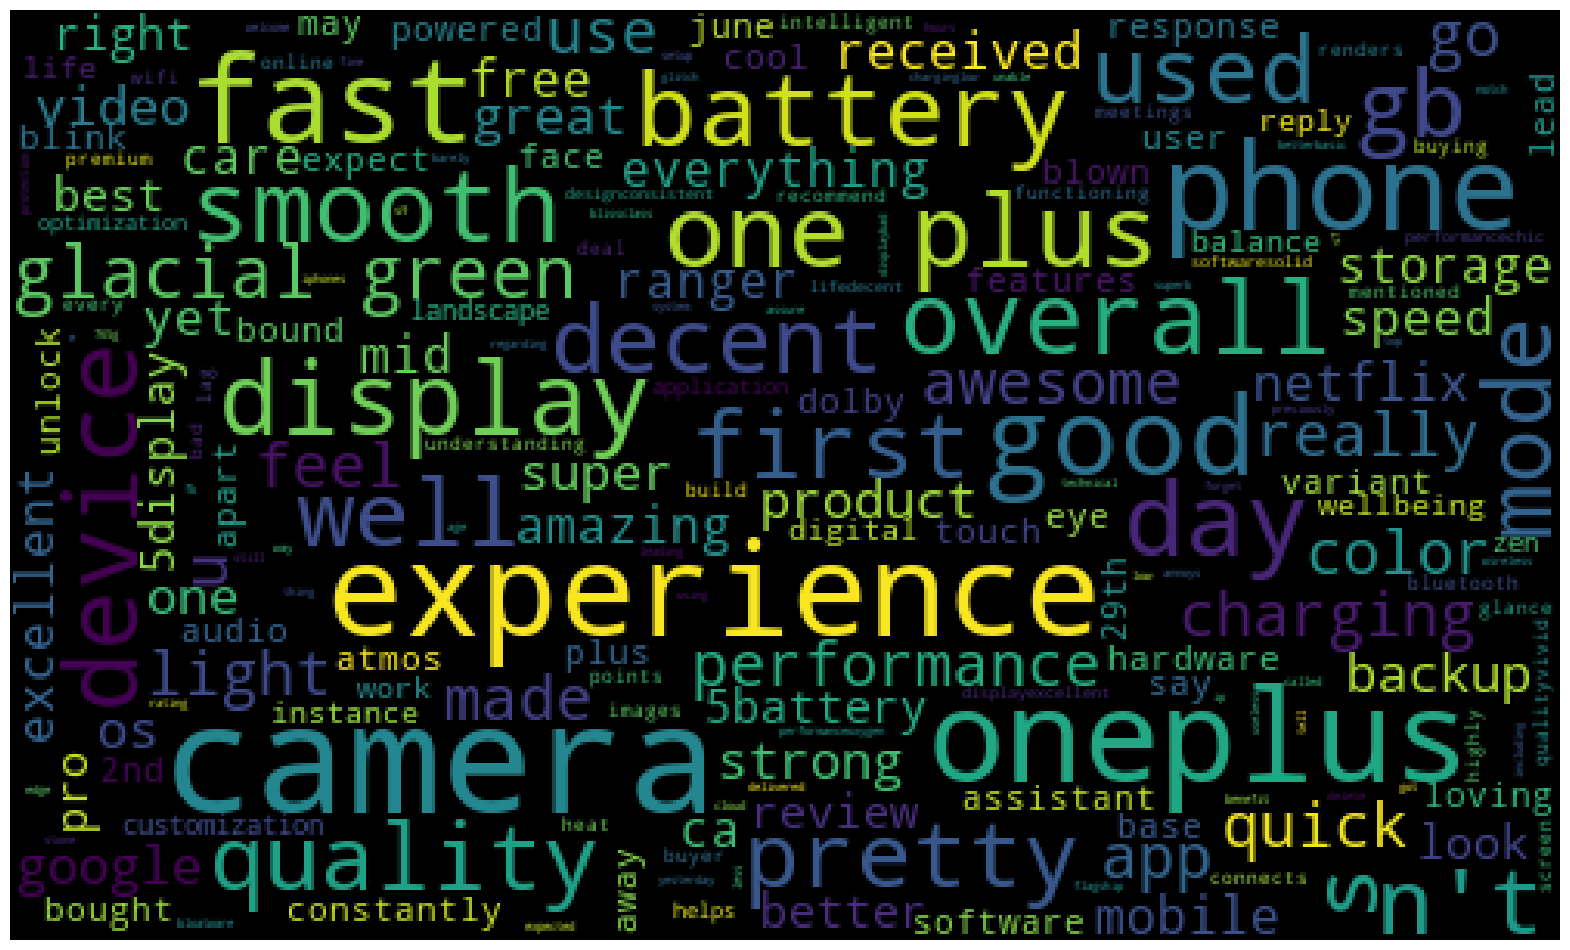

In [36]:
create_word_cloud(brand='OnePlus', sentiment=1)

In [ ]:
create_word_cloud(brand='OnePlus', sentiment=0)

In [ ]:
create_word_cloud(brand='Samsung', sentiment=0)

In [ ]:
create_word_cloud(brand='Samsung', sentiment=1)

In [ ]:
create_word_cloud(brand='MI', sentiment=1)

In [ ]:
create_word_cloud(brand='MI', sentiment=0)

In [ ]:
create_word_cloud(brand='Vivo', sentiment=1)

In [ ]:
create_word_cloud(brand='Vivo', sentiment=0)

In [ ]:
create_word_cloud(brand='Apple', sentiment=1)

In [ ]:
create_word_cloud(brand='Apple', sentiment=0)

In [ ]:
create_word_cloud(brand='OPPO', sentiment=1)

In [ ]:
create_word_cloud(brand='OPPO', sentiment=0)

In [ ]:
df_predicted.dropna(inplace=True)
df_predicted.isna().sum()

In [ ]:
df_predicted

In [ ]:
# Saving the Prediction on a CSV File

df_predicted.to_csv('Prediction.csv')

In [ ]:
# Top 10 recommendation from the sentiment we predicted using our model. 
# After checking with the source file, we can see the top 10 models have highest rating from all users. 

group_pred = df_predicted.groupby(['Model'])['Sentiment'].mean().reset_index()
sort_pred = group_pred.sort_values('Sentiment', ascending=False)
top10 = sort_pred.loc[(sort_pred.Sentiment>0.6)]
top10